In [19]:
# importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import os
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image

In [20]:
# opening the file
for expression in os.listdir("E:\\FACE DETECTION\\dataset\\train\\"):
           print(str(len(os.listdir("E:\\FACE DETECTION\\dataset\\train\\"+expression)))+
           " "+expression+ ' images')

77 Kane Williamson images
77 Kobe Bryant images
77 Maria Sharapova images
77 Ronaldo images


In [21]:
# Defining train and test data to train the model
img_size=48
batch_size=64
datagen_train=ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory("E:\\FACE DETECTION\\dataset\\train\\",target_size=
(48,48), batch_size=batch_size, class_mode='categorical', shuffle=True)
datagen_validation=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_train.flow_from_directory("E:\\FACE DETECTION\\dataset\\test\\",target_size=
(48,48), batch_size=batch_size, class_mode='categorical', shuffle=True)

Found 308 images belonging to 4 classes.
Found 133 images belonging to 4 classes.


In [22]:
from tensorflow.keras.utils import img_to_array, load_img
picture_size=128
folder_path = "E:\\FACE DETECTION\\dataset\\"

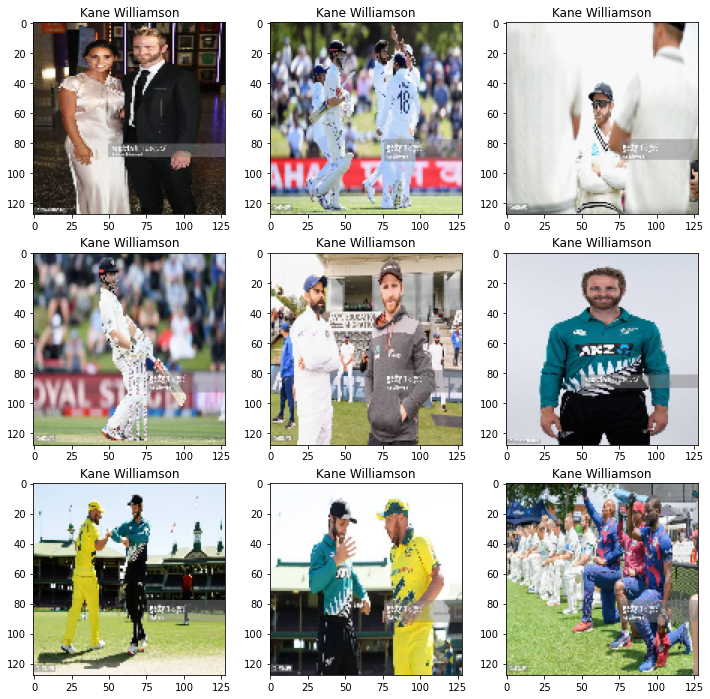

In [23]:
expression = 'Kane Williamson'
plt.figure(figsize= (12,12))
for i in range(1,10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path +"train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.title('Kane Williamson')
    plt.imshow(img)   
plt.show()

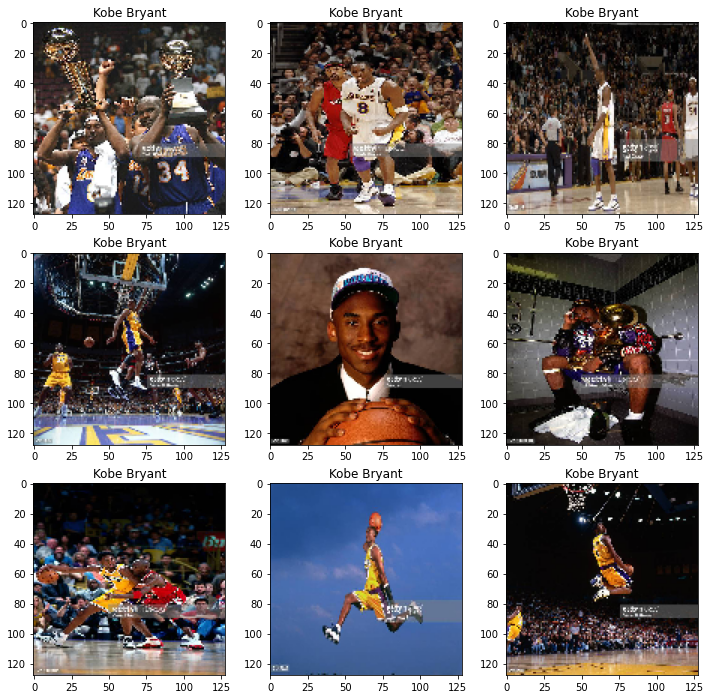

In [24]:
expression = 'Kobe Bryant'
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path +"train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.title('Kobe Bryant')
    plt.imshow(img)   
plt.show()

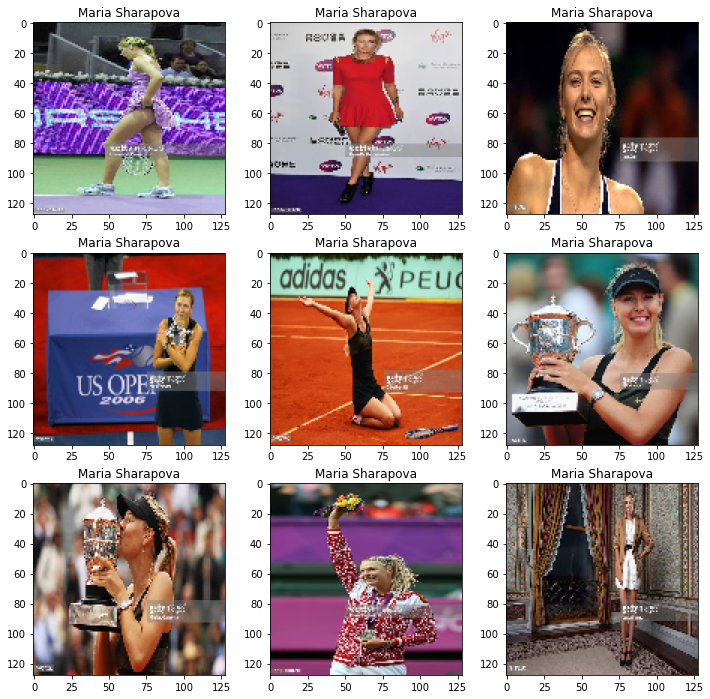

In [25]:
expression = 'Maria Sharapova'
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path +"train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.title('Maria Sharapova')
    plt.imshow(img)   
plt.show()

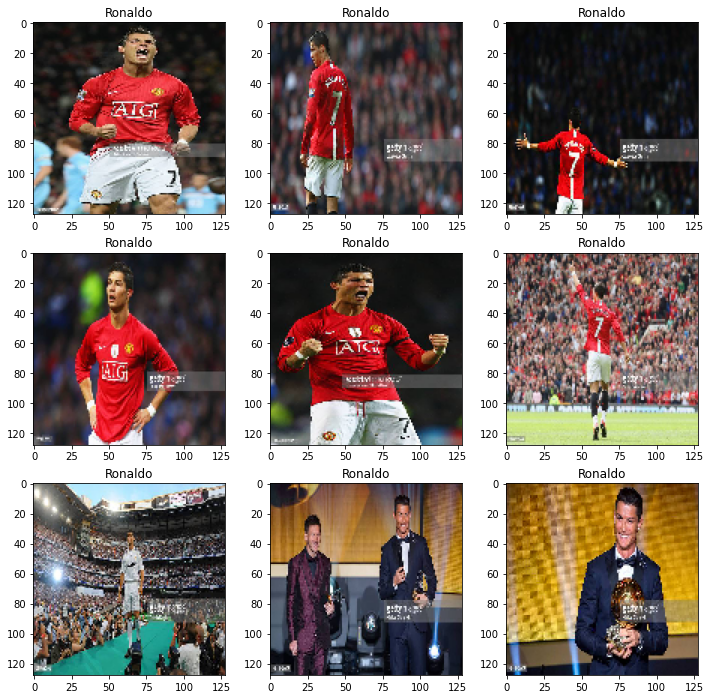

In [26]:
expression = 'Ronaldo'
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path +"train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.title('Ronaldo')
    plt.imshow(img)   
plt.show()

In [27]:
# Training Datagen
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
# Testing Datagen
test_datagen = ImageDataGenerator(rescale=1/255)
x_train=train_datagen.flow_from_directory(r"E:\\FACE DETECTION\\dataset\\train\\",target_size=(64,64), class_mode='categorical',batch_size=900)
# Testing Dataset
x_test=test_datagen.flow_from_directory(r"E:\\FACE DETECTION\\dataset\\test\\",target_size=(64,64), class_mode='categorical',batch_size=900)

Found 308 images belonging to 4 classes.
Found 133 images belonging to 4 classes.


In [28]:
print("Len x-train : ", len(x_train))
print("Len x-test : ", len(x_test))

Len x-train :  1
Len x-test :  1


In [29]:
# The Class Indices in Training Dataset
x_train.class_indices

{'Kane Williamson': 0, 'Kobe Bryant': 1, 'Maria Sharapova': 2, 'Ronaldo': 3}

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
model=Sequential()
# Adding Layers
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

# Adding Hidden Layers
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

# Adding Output Layer
model.add(Dense(4,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [36]:
# Fitting the Model Generator
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=100,validation_data=x_test,validation_steps=len(x_test))

C:\Users\AB TECHNOLOGIES\AppData\Local\Temp\ipykernel_6152\883986968.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=100,validation_data=x_test,validation_steps=len(x_test))


Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 1.4336 - accuracy: 0.2435 - val_loss: 2.9323 - val_accuracy: 0.3158
Epoch 2/100
1/1 [==============================] - 4s 4s/step - loss: 2.5699 - accuracy: 0.2792 - val_loss: 5.8587 - val_accuracy: 0.1955
Epoch 3/100
1/1 [==============================] - 3s 3s/step - loss: 4.7843 - accuracy: 0.2532 - val_loss: 5.6319 - val_accuracy: 0.2481
Epoch 4/100
1/1 [==============================] - 3s 3s/step - loss: 4.9680 - accuracy: 0.2565 - val_loss: 4.4749 - val_accuracy: 0.2481
Epoch 5/100
1/1 [==============================] - 3s 3s/step - loss: 3.8904 - accuracy: 0.2500 - val_loss: 1.9002 - val_accuracy: 0.4662
Epoch 6/100
1/1 [==============================] - 4s 4s/step - loss: 1.8638 - accuracy: 0.4188 - val_loss: 1.9157 - val_accuracy: 0.3158
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 1.8804 - accuracy: 0.2532 - val_loss: 1.5935 - val_accuracy: 0.4135
Epoch 8/100
1/1 [=================

In [37]:
#saving the model
model.save('face_detection.h5')

In [38]:
from tensorflow.keras.models import load_model
classifier = load_model('face_detection.h5')

1/1 [==============================] - 0s 30ms/step


'Kobe Bryant'

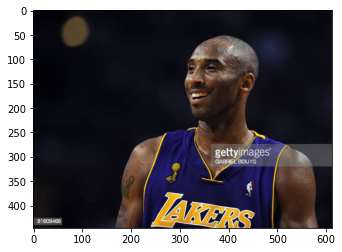

In [55]:
import numpy as np
from tensorflow.keras.preprocessing import image
path = "E:\\FACE DETECTION\\dataset\\input\\6.jpg"
test_image = image.load_img(path)
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.imshow(test_image)
test_img = image.load_img(path, target_size=(64,64))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img,axis=0)
result = classifier.predict(test_img)
a = result.argmax()
s = train_generator.class_indices
name = [ ]
for i in s:
     name.append(i)
for i in range(len(s)):
     if (i==a):
          p=name[i]
p